In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_json('./ratings.json', lines = True)

In [4]:
df.head()

,item_id,user_id,rating
0,5,997206,3.0
1,10,997206,4.0
2,13,997206,4.0
3,17,997206,5.0
4,21,997206,4.0


In [5]:
df = df[~((df['item_id'] == 6003) | (df['item_id'] == 27611) | (df['item_id'] == 66934))]

In [6]:
df.groupby('item_id')['user_id'].count().sort_values(ascending=False)

item_id
318       98967
356       97772
296       93156
593       88573
2571      85431
          ...  
172607        1
172627        1
172639        1
172649        1
237187        1
Name: user_id, Length: 67870, dtype: int64

In [7]:
movie_details = pd.read_json('./metadata_updated.json', lines=True)

In [8]:
i = 0
while i != len(movie_details['title']):
    data = movie_details['title'].iloc[i]
    try:
        data.split()[-1].split('(')[1].split(')')[0]
        i = i+1
    except:
        movie_details = movie_details[movie_details['title'] != data]

In [9]:
i = 0
while i != len(movie_details['title']):
    data = movie_details['title'].iloc[i]
    try:
        int(data.split(')')[-2].split('(')[-1])
        i = i+1
    except:
        movie_details = movie_details[movie_details['title'] != data]

In [10]:
movie_details['dob'] = movie_details['title'].apply(lambda x: int(x.split(')')[-2].split('(')[-1]))

In [11]:
movie_details = movie_details[movie_details['dob'] >= 2000]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28476935 entries, 0 to 28490115
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   item_id  int64  
 1   user_id  int64  
 2   rating   float64
dtypes: float64(1), int64(2)
memory usage: 869.0 MB


In [13]:
df = df.merge(movie_details, on='item_id')

In [14]:
df.groupby('item_id')['user_id'].count().sort_values(ascending=False)

item_id
4993      62701
7153      58158
5952      57469
3578      49327
4306      47430
          ...  
195675        1
138372        1
138374        1
195667        1
237131        1
Name: user_id, Length: 37998, dtype: int64

In [15]:
len(df[df['item_id'] == 122912]) # my favourite movie

4494

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
Y = df.groupby('item_id')['user_id'].count().sort_values(ascending=False).tolist()

In [18]:
len(Y)

37998

In [19]:
X = np.arange(len(Y));

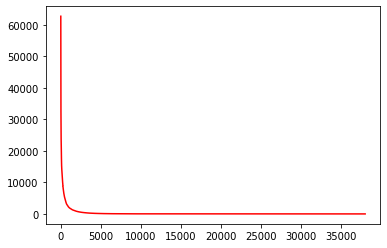

In [20]:
plt.plot(X, Y, 'r')

In [21]:
Y_ = X*0

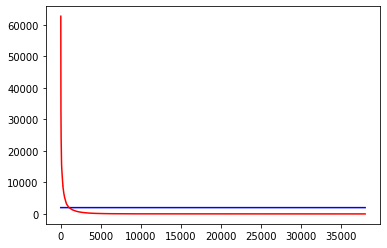

In [22]:
plt.plot(X, Y_+2000, 'b')
plt.plot(X, Y, 'r')

In [23]:
movie_rating_count = df.groupby('item_id')['user_id'].count().sort_values(ascending=False)

In [24]:
nmovie_rating_count= movie_rating_count[movie_rating_count > 2000]

In [25]:
movies_rectified = pd.DataFrame(nmovie_rating_count.index)

In [26]:
df = df.merge(movies_rectified, on='item_id')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7774440 entries, 0 to 7774439
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item_id     int64  
 1   user_id     int64  
 2   rating      float64
 3   title       object 
 4   directedBy  object 
 5   starring    object 
 6   avgRating   float64
 7   imdbId      int64  
 8   dob         int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 593.1+ MB


In [28]:
df.head()

,item_id,user_id,rating,title,directedBy,starring,avgRating,imdbId,dob
0,3275,222768,1.0,"Boondock Saints, The (2000)",Troy Duffy,"Willem Dafoe, David Della Rocco, Sean Patrick ...",3.87081,144117,2000
1,3275,675368,2.0,"Boondock Saints, The (2000)",Troy Duffy,"Willem Dafoe, David Della Rocco, Sean Patrick ...",3.87081,144117,2000
2,3275,10010,5.0,"Boondock Saints, The (2000)",Troy Duffy,"Willem Dafoe, David Della Rocco, Sean Patrick ...",3.87081,144117,2000
3,3275,132140,2.0,"Boondock Saints, The (2000)",Troy Duffy,"Willem Dafoe, David Della Rocco, Sean Patrick ...",3.87081,144117,2000
4,3275,664065,4.0,"Boondock Saints, The (2000)",Troy Duffy,"Willem Dafoe, David Della Rocco, Sean Patrick ...",3.87081,144117,2000


In [29]:
newdf = df.drop(['title', 'directedBy', 'starring', 'avgRating', 'imdbId', 'dob'], axis=1)

In [30]:
newdf.drop_duplicates().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7763860 entries, 0 to 7774439
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   item_id  int64  
 1   user_id  int64  
 2   rating   float64
dtypes: float64(1), int64(2)
memory usage: 236.9 MB


In [31]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7774440 entries, 0 to 7774439
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   item_id  int64  
 1   user_id  int64  
 2   rating   float64
dtypes: float64(1), int64(2)
memory usage: 237.3 MB


In [32]:
newdf.drop_duplicates(inplace=True)

In [34]:
newdf = pd.DataFrame(newdf.groupby(['item_id', 'user_id'])['rating'].mean())

In [35]:
newdf.reset_index(inplace = True)

In [36]:
movie_ratings = newdf.pivot(values = 'rating', index = 'item_id', columns = 'user_id')

In [37]:
import gc
gc.collect()

4

In [38]:
movie_ratings = movie_ratings.fillna(0).reset_index()

In [39]:
movie_details = df[['item_id', 'dob', 'starring', 'avgRating', 'directedBy']].drop_duplicates()

In [53]:
newdf.groupby('item_id')['user_id'].count().sort_values(ascending=False).index

Int64Index([  4993,   7153,   5952,   3578,   4306,  58559,   4226,  79132,
              6539,   4973,
            ...
              5784,   3987,  39435, 112515,  79057,   4155,   5093,  53956,
              4228,   4387],
           dtype='int64', name='item_id', length=1048)

In [ ]:
import gc
del df

In [ ]:
gc.collect()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(tokenizer=lambda x: [y.strip() for y in x.split(',')])

In [ ]:
movie_features = cv.fit_transform(movie_details['starring']).toarray()

In [ ]:
movie_features = pd.DataFrame(movie_features)

In [ ]:
movie_features['item_id'] = movie_ratings['item_id']

In [ ]:
cv1 = CountVectorizer()
extra_features = cv1.fit_transform(movie_details['directedBy']).toarray()

In [ ]:
extra_features = pd.DataFrame(extra_features)

In [ ]:
extra_features.head()

In [ ]:
extra_features['item_id'] = movie_ratings['item_id']

In [ ]:
total_features = movie_ratings.merge(movie_features, on='item_id').merge(extra_features, on='item_id')

In [ ]:
total_features.head()

In [ ]:
total_features.shape

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(total_features.values)

In [ ]:
scaler_transformed = scaler.transform(total_features.values)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=100)

In [ ]:
pca.fit(scaler_transformed)

In [ ]:
transformed_data = pca.transform(scaler_transformed)

In [ ]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=21)

In [ ]:
model.fit(transformed_data)

In [ ]:
model.kneighbors(transformed_data)[1][0]

In [ ]:
checkarry = model.kneighbors(transformed_data)[1][0]

In [ ]:
check_movie_items = pd.DataFrame(checkarry)

In [ ]:
check_movie_items.head()

In [ ]:
check_movie_items.rename(columns={0:'movie_loc'}, inplace=True)

In [ ]:
check_movie_items['item_id'] = check_movie_items['movie_loc'].apply(lambda x: movie_ratings['item_id'].iloc[x])

In [ ]:
check_movie_items.head()

In [ ]:
movie_indexes=movie_features['item_id'].tolist()

In [ ]:
"""
Saving features using joblib
1. model
5. transformed_data
6. movie_index
"""
from joblib import dump
dump((model, transformed_data, movie_indexes),  './required_contents.joblib')

In [ ]:
movie_details = pd.read_json('metadata_updated.json', lines = True)

In [ ]:
links = movie_details[['item_id', 'imdbId']]

In [ ]:
links = links.merge(movie_features['item_id'])

In [ ]:
links.rename({'item_id': 'movieId'}, axis=1, inplace=True)

In [ ]:
links.head()

In [ ]:
links.to_csv('./links.csv')

In [ ]:
movie_loc = pd.DataFrame(movie_indexes, columns=['item_id'])

In [ ]:
movie_loc

In [ ]:
all_genres = "Action, Adventure, Animation, Comedy, Crime, Documentary, Drama, Family, Fantasy, History, Horror, Music, Mystery, Romance, Science Fiction, Thriller, TV Movie, War,Western"

In [ ]:
all_genres = [x.strip() for x in all_genres.split(',')]

In [ ]:
dump(all_genres, './all_genres.joblib')

In [ ]:
popular_movies_list = newdf.groupby('item_id')['user_id'].count().sort_values(ascending=False).index

In [ ]:
dump(popular_movies_list, './popular_movies_list.joblib')